In [3]:
"""
@filename: LinearRegression
@dataset: insurance
@author: waisullah yousofi
"""

'\n@filename: LinearRegression\n@dataset: insurance\n@author: waisullah yousofi\n'

hides all warnings

In [4]:
import warnings
warnings.filterwarnings('ignore')

imports<br>
pandas 

In [5]:
import pandas as pd
# numpy
import numpy as np
# matplotlib 
import matplotlib.pyplot as plt
#%matplotlib inline
plt.style.use('ggplot')
# seaborn
import seaborn as sns
# utils
import utils

############################################################<br>
Read Data <br>
############################################################

read dataset

In [6]:
df = pd.read_csv('..\dataset/insurance.csv')

############################################################<br>
Exploratory Data Analytics<br>
############################################################

columns

In [7]:
print("\n*** Columns ***")
print(df.columns)


*** Columns ***
Index(['id', 'age', 'gender', 'bmi', 'children', 'smoker', 'region', 'noise',
       'charges'],
      dtype='object')


info

In [8]:
print("\n*** Structure ***")
print(df.info())


*** Structure ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   gender    1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   noise     1338 non-null   int64  
 8   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 94.2+ KB
None


summary

In [9]:
print("\n*** Summary ***")
#print(df.describe())
print(df.describe(include=np.number))
print(df.describe(include=np.object))


*** Summary ***
                id          age          bmi     children        noise  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean    669.500000    39.207025    30.663397     1.094918    75.310164   
std     386.391641    14.049960     6.098187     1.205493    14.780526   
min       1.000000    18.000000    15.960000     0.000000    50.000000   
25%     335.250000    27.000000    26.296250     0.000000    62.000000   
50%     669.500000    39.000000    30.400000     1.000000    76.000000   
75%    1003.750000    51.000000    34.693750     2.000000    88.000000   
max    1338.000000    64.000000    53.130000     5.000000   100.000000   

            charges  
count   1338.000000  
mean   13270.422265  
std    12110.011237  
min     1121.873900  
25%     4740.287150  
50%     9382.033000  
75%    16639.912515  
max    63770.428010  
       gender smoker     region
count    1338   1338       1338
unique      2      2          4
top      male     no  

head

In [10]:
print("\n*** Head ***")
print(df.head())


*** Head ***
   id  age  gender     bmi  children smoker     region  noise      charges
0   1   19  female  27.900         0    yes  southwest     90  16884.92400
1   2   18    male  33.770         1     no  southeast     69   1725.55230
2   3   28    male  33.000         3     no  southeast     82   4449.46200
3   4   33    male  22.705         0     no  northwest     71  21984.47061
4   5   32    male  28.880         0     no  northwest     76   3866.85520


############################################################<br>
Dependent Variable <br>
############################################################

store dep variable  <br>
change as required

In [11]:
depVars = "charges"
print("\n*** Dep Vars ***")
print(depVars)


*** Dep Vars ***
charges


############################################################<br>
Data Transformation<br>
############################################################

drop cols which contain identifiers, nominals, descriptions<br>
change as required

In [12]:
print("\n*** Drop Cols ***")
df = df.drop('id', axis=1)
print("Done ...")


*** Drop Cols ***
Done ...


transformations<br>
change as required

In [13]:
print("\n*** Transformations ***")


*** Transformations ***


ince the gender is an independent variable, it has to be cont numeric or categoric numeric<br>
convert string / categoric to numeric

In [14]:
print("Unique Gender")
print(df['gender'].unique())
df['gender'] = df['gender'].map({"male": 0, "female": 1})
#df['gender'] = pd.Categorical(df['gender'])
#df['gender'] = df['gender'].cat.codes
print(df['gender'].unique())

Unique Gender
['female' 'male']
[1 0]


convert string / categoric to numeric

In [15]:
print("Unique Smoker")
print(df['smoker'].unique())
df['smoker'] = df['smoker'].map({"no": 0, "yes": 1})
print(df['smoker'].unique())

Unique Smoker
['yes' 'no']
[1 0]


convert string / categoric to numeric

In [16]:
print("Unique Region")
print(df['region'].unique())
from sklearn import preprocessing
leReg = preprocessing.LabelEncoder()
df['region'] = leReg.fit_transform(df['region'])
print(df['region'].unique())
print("Done ...")

Unique Region
['southwest' 'southeast' 'northwest' 'northeast']
[3 2 1 0]
Done ...


check outlier count

In [17]:
print('\n*** Outlier Count ***')
print(utils.OutlierCount(df))


*** Outlier Count ***
age           0
gender        0
bmi           0
children      0
smoker      274
region        0
noise         0
charges       6
dtype: int64


check outlier values

In [18]:
print('\n*** Outlier Values ***')
print(utils.OutlierValues(df))


*** Outlier Values ***
age                                                        []
gender                                                     []
bmi                                                        []
children                                                   []
smoker      [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
region                                                     []
noise                                                      []
charges     [63770.42801 58571.07448 55135.40209 52590.829...
dtype: object


handle outliers if required

check variance

In [19]:
print('\n*** Variance In Columns ***')
print(df.var())


*** Variance In Columns ***
age         1.974014e+02
gender      2.501596e-01
bmi         3.718788e+01
children    1.453213e+00
smoker      1.629689e-01
region      1.220771e+00
noise       2.184639e+02
charges     1.466524e+08
dtype: float64


check std dev 

In [20]:
print('\n*** StdDev In Columns ***')
print(df.std())


*** StdDev In Columns ***
age            14.049960
gender          0.500160
bmi             6.098187
children        1.205493
smoker          0.403694
region          1.104885
noise          14.780526
charges     12110.011237
dtype: float64


check mean

In [21]:
print('\n*** Mean In Columns ***')
print(df.mean())


*** Mean In Columns ***
age            39.207025
gender          0.494768
bmi            30.663397
children        1.094918
smoker          0.204783
region          1.515695
noise          75.310164
charges     13270.422265
dtype: float64


handle normalization if required

check zeros

In [22]:
print('\n*** Columns With Zeros ***')
print((df==0).sum())


*** Columns With Zeros ***
age            0
gender       676
bmi            0
children     574
smoker      1064
region       324
noise          0
charges        0
dtype: int64


handle zeros if required

check nulls

In [23]:
print('\n*** Columns With Nulls ***')
print(df.isnull().sum()) 


*** Columns With Nulls ***
age         0
gender      0
bmi         0
children    0
smoker      0
region      0
noise       0
charges     0
dtype: int64


handle nulls if required

check relation with corelation - table

In [24]:
print("\n*** Correlation Table ***")
pd.options.display.float_format = '{:,.3f}'.format
print(df.corr())


*** Correlation Table ***
            age  gender    bmi  children  smoker  region  noise  charges
age       1.000   0.021  0.109     0.042  -0.025   0.002 -0.029    0.299
gender    0.021   1.000 -0.046    -0.017  -0.076  -0.005  0.077   -0.057
bmi       0.109  -0.046  1.000     0.013   0.004   0.158 -0.008    0.198
children  0.042  -0.017  0.013     1.000   0.008   0.017 -0.021    0.068
smoker   -0.025  -0.076  0.004     0.008   1.000  -0.002  0.027    0.787
region    0.002  -0.005  0.158     0.017  -0.002   1.000  0.008   -0.006
noise    -0.029   0.077 -0.008    -0.021   0.027   0.008  1.000    0.003
charges   0.299  -0.057  0.198     0.068   0.787  -0.006  0.003    1.000


handle multi colinearity if required

############################################################<br>
Visual Data Analytics<br>
############################################################

check relation with corelation - heatmap<br>
emoving column will be done using pvalue, it means if columns are correlated internally then <br>
value will be higher than 0.0.5 for one of those clolumns which we will drop them 


*** Heat Map ***


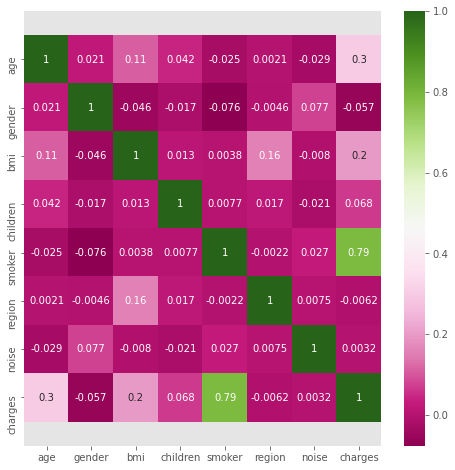

In [25]:
print("\n*** Heat Map ***")
plt.figure(figsize=(8,8))
ax = sns.heatmap(df.corr(), annot=True, cmap="PiYG")
# data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

boxplot


*** Boxplot ***


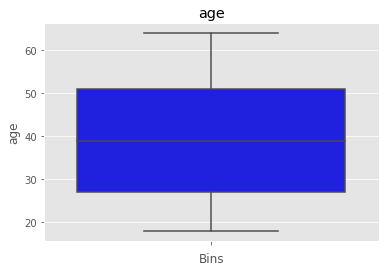

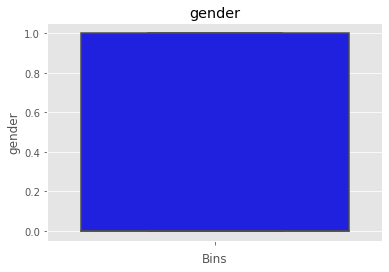

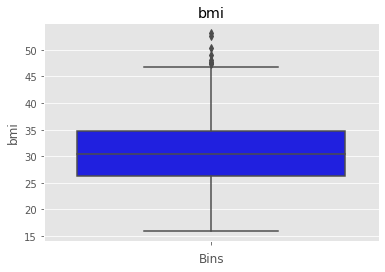

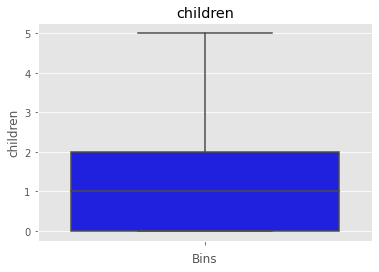

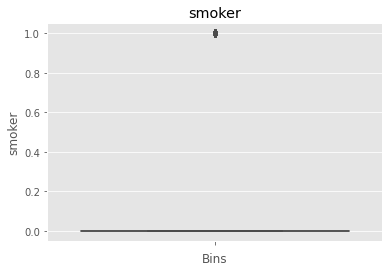

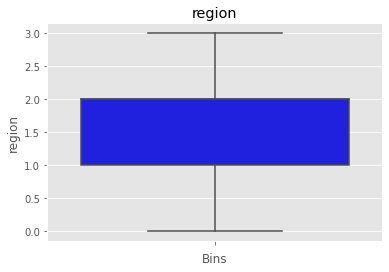

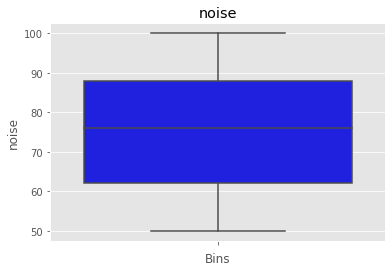

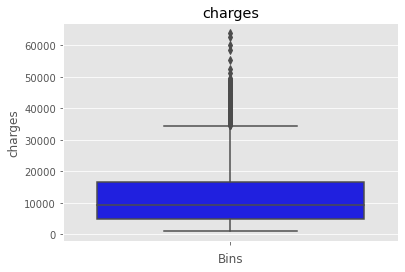

In [26]:
print('\n*** Boxplot ***')
colNames = df.columns.tolist()
for colName in colNames:
    plt.figure()
    sns.boxplot(y=df[colName], color='b')
    plt.title(colName)
    plt.ylabel(colName)
    plt.xlabel('Bins')
    plt.show()

histograms<br>
https://www.qimacros.com/histogram-excel/how-to-determine-histogram-bin-interval/<br>
plot histograms


*** Histograms ***


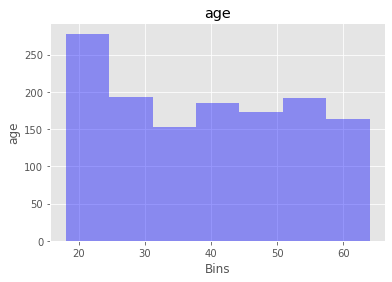

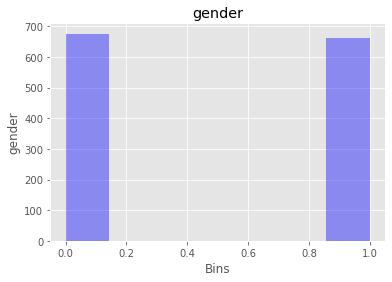

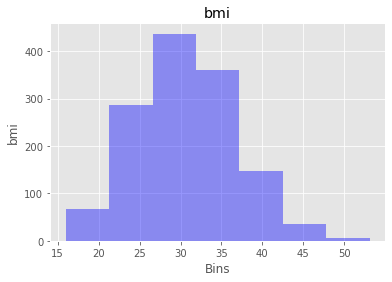

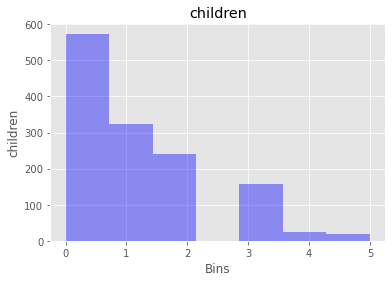

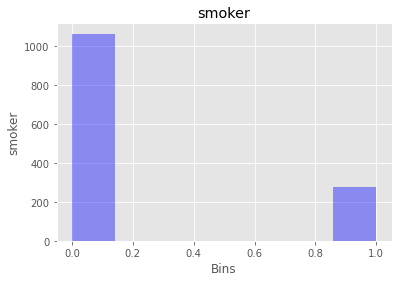

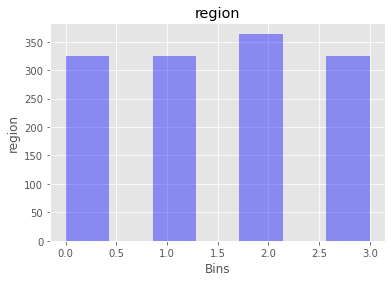

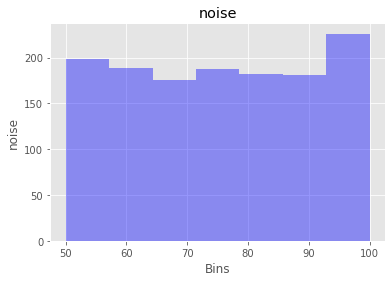

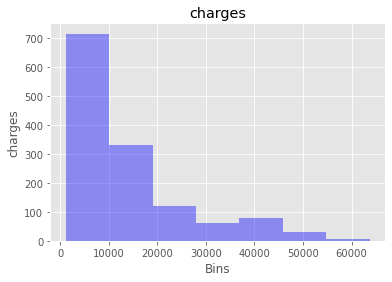

In [27]:
print('\n*** Histograms ***')
colNames = df.columns.tolist()
for colName in colNames:
    colValues = df[colName].values
    plt.figure()
    sns.distplot(colValues, bins=7, kde=False, color='b')
    plt.title(colName)
    plt.ylabel(colName)
    plt.xlabel('Bins')
    plt.show()

scatterplots<br>
plot Sscatterplot


*** Scatterplot ***
charges


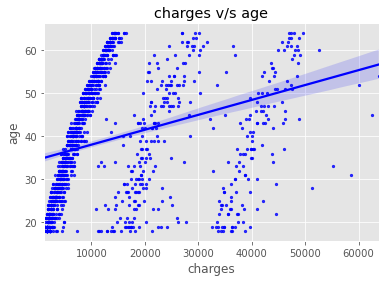

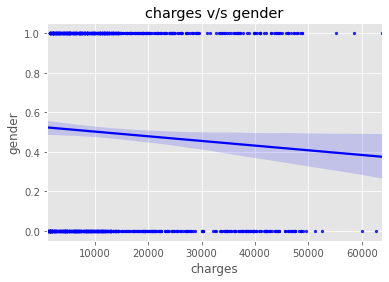

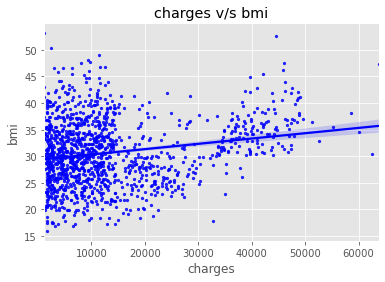

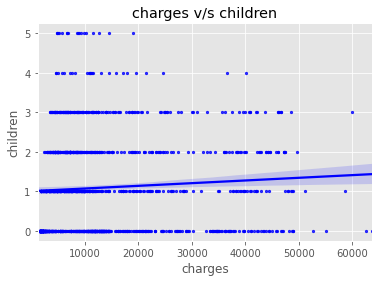

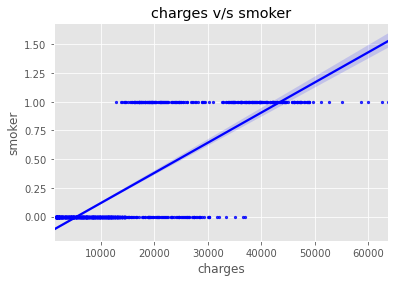

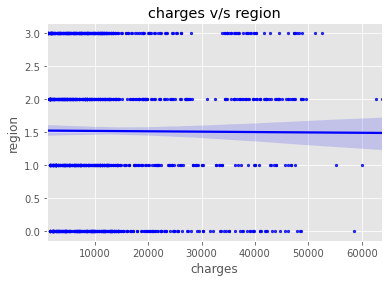

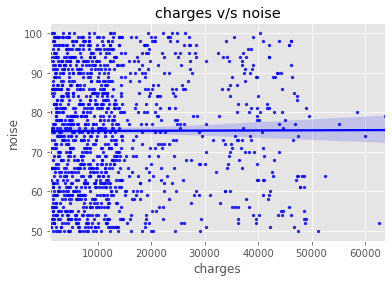

In [28]:
print('\n*** Scatterplot ***')
colNames = df.columns.tolist()
colNames.remove(depVars)
print(colName)
for colName in colNames:
    colValues = df[colName].values
    plt.figure()
    sns.regplot(data=df, x=depVars, y=colName, color= 'b', scatter_kws={"s": 5})
    plt.title(depVars + ' v/s ' + colName)
    plt.show()

class count plot<br>
change as required


*** Distribution Plot ***


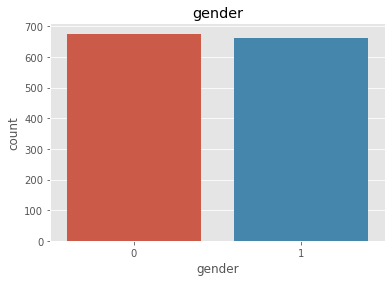

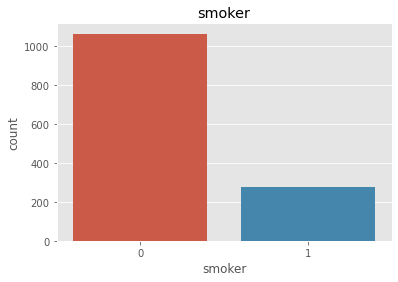

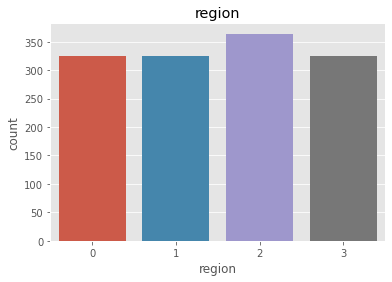

In [29]:
colNames = ["gender","smoker", "region"]
print("\n*** Distribution Plot ***")
for colName in colNames:
    plt.figure()
    sns.countplot(df[colName],label="Count")
    plt.title(colName)
    plt.show()

##############################<br>
Split Train & Test<br>
#############################

split into data & target<br>
raction of train data is 80% and test data will be 20%.

In [30]:
print("\n*** Prepare Data ***")
dftrain = df.sample(frac=0.8, random_state=707)
dftest=df.drop(dftrain.index)
print("Train Count:",len(dftrain.index))
print("Test Count :",len(dftest.index))


*** Prepare Data ***
Train Count: 1070
Test Count : 268


############################################################<br>
Model Creation & Fitting <br>
############################################################

all cols except dep var 

In [31]:
print("\n*** Regression Data For Train ***")
allCols = dftrain.columns.tolist()
print(allCols)
allCols.remove(depVars)
print(allCols)


*** Regression Data For Train ***
['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'noise', 'charges']
['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'noise']


regression summary for feature<br>
https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

In [32]:
print("\n*** Regression Summary ***")
import statsmodels.api as sm
X = sm.add_constant(dftrain[allCols])
y = dftrain[depVars]
OlsSmry = sm.OLS(y, X)
LRModel = OlsSmry.fit()
print(LRModel.summary())


*** Regression Summary ***
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     445.4
Date:                Mon, 13 Sep 2021   Prob (F-statistic):          1.08e-310
Time:                        23:47:21   Log-Likelihood:                -10841.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1062   BIC:                         2.174e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.172e+04   

remove columns(gender and onoise) with p-value > 0.05 bcoz we will not consider them<br>
e just remove from the list.<br>
chnage as require

In [33]:
allCols.remove('gender')
allCols.remove('noise')
print(allCols)

['age', 'bmi', 'children', 'smoker', 'region']


regression summary for feature<br>
ere we are cheching the columns having pvalues less than 0.05 after drop those greater than 0.05<br>
n the summay pvalue=0.000 means it is close to zero pvalue cant be zero.

In [34]:
print("\n*** Regression Summary Again ***")
#here capital X shows 2D array of independent vars and y shows dependent variable charges
X = sm.add_constant(dftrain[allCols])
y = dftrain[depVars]
OlsSmry = sm.OLS(y, X)
LRModel = OlsSmry.fit()
print(LRModel.summary())


*** Regression Summary Again ***
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     624.5
Date:                Mon, 13 Sep 2021   Prob (F-statistic):          1.94e-313
Time:                        23:47:27   Log-Likelihood:                -10841.
No. Observations:                1070   AIC:                         2.169e+04
Df Residuals:                    1064   BIC:                         2.172e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.209e

now create linear regression model<br>
e want to make sure our data is in 2D array<br>
irst we soould convert df into array and then into 2D array.

In [35]:
print("\n*** Regression Model ***")
X = dftrain[allCols].values#--- X has to be 2D array
y = dftrain[depVars].values#----y can be 1D array
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))


*** Regression Model ***
(1070, 5)
(1070,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
print(model)
print("Done ...")

LinearRegression()
Done ...


############################################################<br>
predict with train data <br>
############################################################

predict

In [37]:
print("\n*** Predict - Train Data ***")
p = model.predict(X)
dftrain['predict'] = p
print("Done ...")


*** Predict - Train Data ***
Done ...


############################################################<br>
Model Evaluation - Train Data<br>
############################################################

visualize 


*** Scatter Plot ***


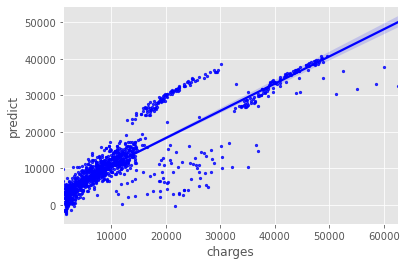

In [38]:
print("\n*** Scatter Plot ***")
plt.figure()
sns.regplot(data=dftrain, x=depVars, y='predict', color='b', scatter_kws={"s": 5})
plt.show()

mae 

In [39]:
print("\n*** Mean Absolute Error ***")
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(dftrain[depVars], dftrain['predict'])
print(mae)


*** Mean Absolute Error ***
4200.287597538856


mse 

In [40]:
print("\n*** Mean Squared Error ***")
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dftrain[depVars], dftrain['predict'])
print(mse)
   
# rmse : it shows
#https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/
print("\n*** Root Mean Squared Error ***")
rmse = np.sqrt(mse)
print(rmse)
#since the rmse is greater than 100, so we should check the SI value for evaluaition.
#
# check mean
print('\n*** Mean ***')
print(dftrain[depVars].mean())
print(dftrain['predict'].mean())


*** Mean Squared Error ***
36990210.08654905

*** Root Mean Squared Error ***
6081.957751131543

*** Mean ***
13216.093560671969
13216.093560671974


scatter index (SI) is defined to judge whether RMSE is good or not. <br>
SI=RMSE/measured data mean. <br>
If SI is less than one, your estimations are acceptable.<br>
closer to zero the better the model is.

In [41]:
print('\n*** Scatter Index ***')
si = rmse/dftrain[depVars].mean()
print(si)
#si less than 1 indicates acceptable result.


*** Scatter Index ***
0.46019330320345486


############################################################<br>
confirm with test data <br>
############################################################

all cols except dep var 

In [42]:
print("\n*** Regression Data For Test ***")
print(allCols)
# split
X = dftest[allCols].values
y = dftest[depVars].values
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))


*** Regression Data For Test ***
['age', 'bmi', 'children', 'smoker', 'region']
(268, 5)
(268,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


predict

In [43]:
print("\n*** Predict - Test Data ***")
p = model.predict(X)
dftest['predict'] = p
print("Done ...")


*** Predict - Test Data ***
Done ...


############################################################<br>
Model Evaluation - Test Data<br>
############################################################

visualize 


*** Scatter Plot ***


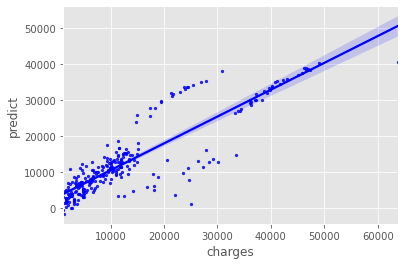

In [44]:
print("\n*** Scatter Plot ***")
plt.figure()
sns.regplot(data=dftest, x=depVars, y='predict', color='b', scatter_kws={"s": 5})
plt.show()

mae 

In [45]:
print("\n*** Mean Absolute Error ***")
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(dftest[depVars], dftest['predict'])
print(mae)


*** Mean Absolute Error ***
4149.865736507709


mse 

In [46]:
print("\n*** Mean Squared Error ***")
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dftest[depVars], dftest['predict'])
print(mse)
   
# rmse 
# RMSE measures the error.  How good is an error depends on the amplitude of your data. 
# RMSE should be less 10% for mean(depVars)
print("\n*** Root Mean Squared Error ***")
rmse = np.sqrt(mse)
print(rmse)
#rmse is >100 so we should check SI value.
# check mean
print('\n*** Mean ***')
print(dftest[depVars].mean())
print(dftest['predict'].mean())
 
# scatter index
# scatter index less than 1; the predictions are decent
print('\n*** Scatter Index ***')
si = rmse/dftest[depVars].mean()
print(si)
#its is  0.44 which is less than one---acceptable prediction reslt.


*** Mean Squared Error ***
34951716.076594494

*** Root Mean Squared Error ***
5911.997638412459

*** Mean ***
13487.331644925369
13039.173227567106

*** Scatter Index ***
0.4383370850554311


############################################################<br>
predict from new data <br>
############################################################

create model from full new dataset

In [47]:
print(allCols)

['age', 'bmi', 'children', 'smoker', 'region']


regression summary for feature

In [48]:
print("\n*** Regression Summary Again ***")
X = sm.add_constant(df[allCols])
y = df[depVars]
OlsSmry = sm.OLS(y, X)
LRModel = OlsSmry.fit()
print(LRModel.summary())


*** Regression Summary Again ***
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     802.2
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:47:36   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.187e

now create linear regression model

In [49]:
print("\n*** Regression Model ***")
X = df[allCols].values
y = df[depVars].values
model = LinearRegression()
model.fit(X,y)
print(model)


*** Regression Model ***
LinearRegression()


read dataset

In [52]:
dfp = pd.read_csv('..\dataset/insurance-prd.csv')

In [53]:
print("\n*** Structure ***")
print(dfp.info())


*** Structure ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        12 non-null     int64  
 1   age       12 non-null     int64  
 2   gender    12 non-null     object 
 3   bmi       12 non-null     float64
 4   children  12 non-null     int64  
 5   smoker    12 non-null     object 
 6   region    12 non-null     object 
 7   noise     12 non-null     int64  
 8   charges   12 non-null     float64
dtypes: float64(2), int64(4), object(3)
memory usage: 992.0+ bytes
None


drop cols <br>
change as required<br>
dfp = dfp.drop('id', axis=1)<br>
change as required<br>
convert string / categoric to numeric

In [54]:
dfp['gender'] = dfp['gender'].map({"male": 0, "female": 1})
# convert string / categoric to numeric
dfp['smoker'] = dfp['smoker'].map({"no": 0, "yes": 1})
# convert string / categoric to numeric
dfp['region'] = leReg.transform(dfp['region'])

split X & y

In [55]:
prd_X = dfp[allCols].values
prd_y = dfp[depVars].values

predict

In [56]:
prd_p = model.predict(prd_X)
dfp['predict'] = prd_p

visualize 


*** Scatter Plot ***


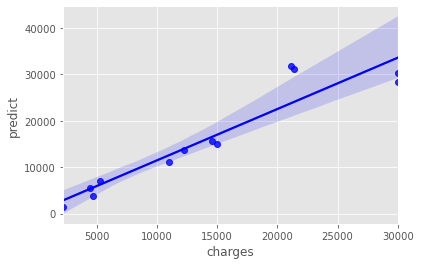

In [57]:
print("\n*** Scatter Plot ***")
plt.figure()
sns.regplot(data=dfp, x=depVars, y='predict', color= 'b')
plt.show()

mae 

In [58]:
print("\n*** Mean Absolute Error ***")
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(dfp[depVars], dfp['predict'])
print(mae)


*** Mean Absolute Error ***
2448.0522840494727


mse

In [59]:
print("\n*** Mean Squared Error ***")
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dfp[depVars], dfp['predict'])
print(mse)


*** Mean Squared Error ***
18502671.850720268


rmse

In [60]:
print("\n*** Root Mean Squared Error ***")
rmse = np.sqrt(mse)
print(rmse)


*** Root Mean Squared Error ***
4301.473218645011


check mean

In [61]:
print('\n*** Mean ***')
print(dfp[depVars].mean())
print(dfp['predict'].mean())


*** Mean ***
14319.91910833333
16240.336255756594


scatter index<br>
scatter index less than 1; the predictions are good

In [62]:
print('\n*** Scatter Index ***')
si = rmse/dfp[depVars].mean()
print(si)
#si 0.3 indicates acceptable prediction result


*** Scatter Index ***
0.30038390483238225
